In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/Biswajeetray07/Datasets/refs/heads/main/loan_data.csv"
df = pd.read_csv(url)
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [2]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 45000, Columns: 14


In [ ]:
df.isnull().value_counts().sum()

np.int64(45000)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Cell 6: numeric summary (looking for ranges, quartiles, suspicious mins/maxs)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


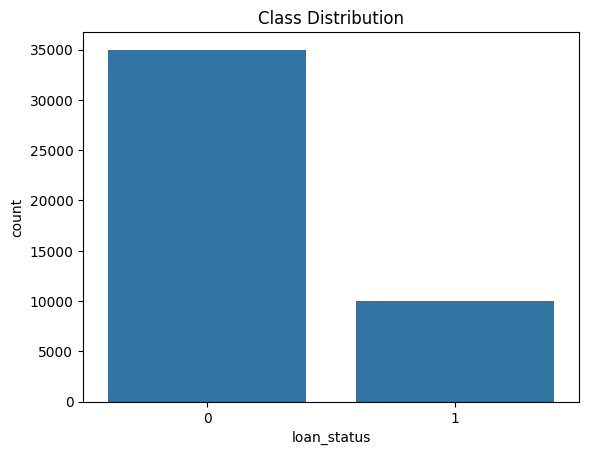

Class Counts:
 loan_status
0    35000
1    10000
Name: count, dtype: int64

Class Percentages:
 loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


In [18]:
import seaborn as sns

sns.countplot(x=df['loan_status'])
plt.title("Class Distribution")
plt.show()
def check_imbalance(df, target):
    counts = df[target].value_counts()
    percent = df[target].value_counts(normalize=True) * 100

    print("Class Counts:\n", counts)
    print("\nClass Percentages:\n", percent)

check_imbalance(df, "loan_status")


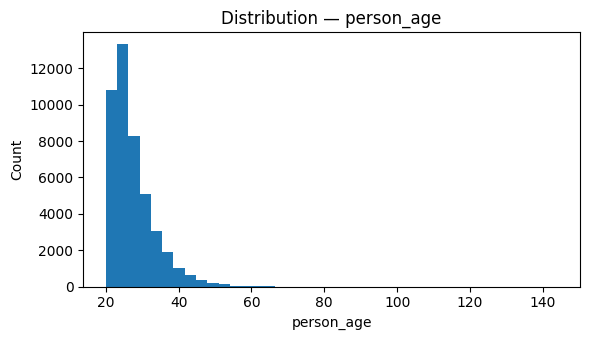

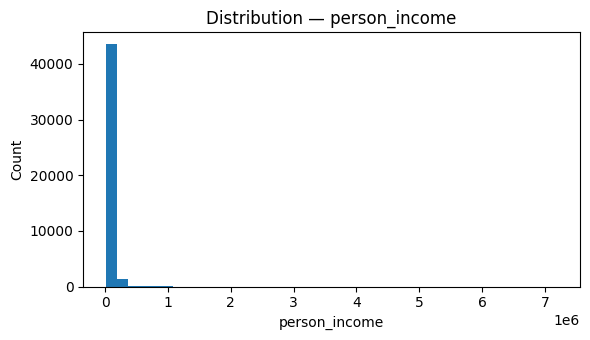

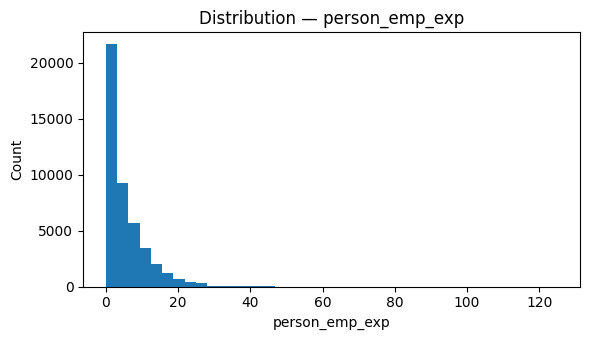

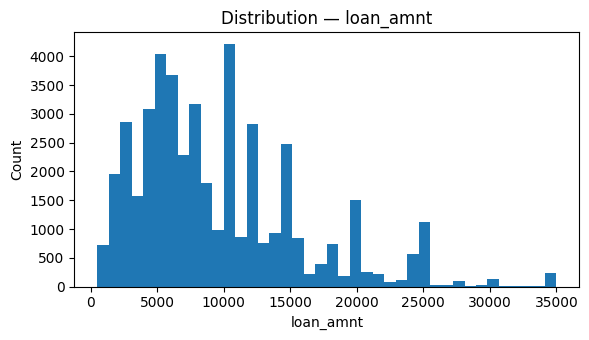

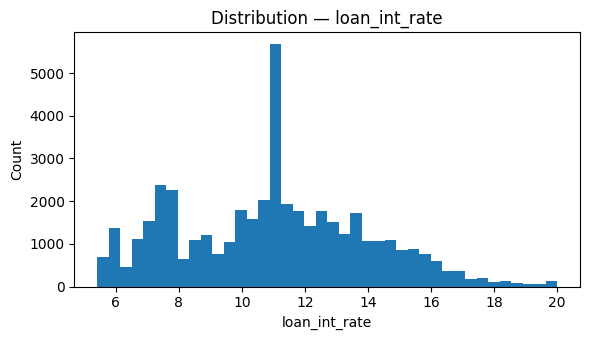

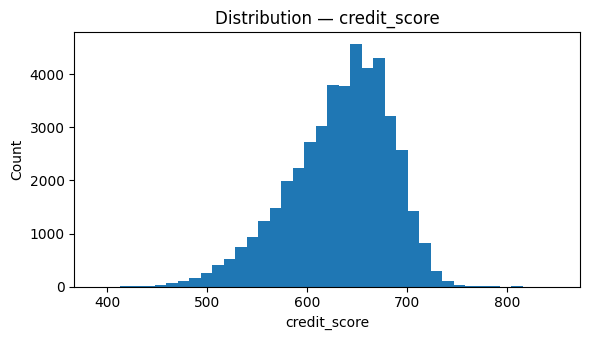

In [19]:
# Cell 7: histograms (matplotlib, no seaborn)
plot_cols = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','credit_score']
plot_cols = [c for c in plot_cols if c in df.columns]

for col in plot_cols:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[col].dropna(), bins=40)
    plt.title(f"Distribution — {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


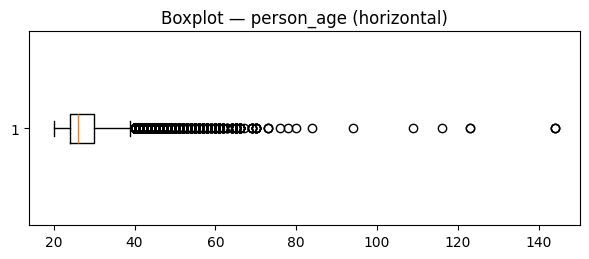

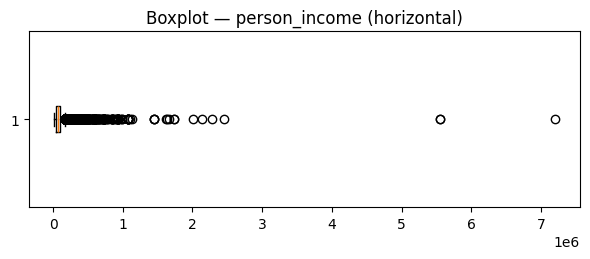

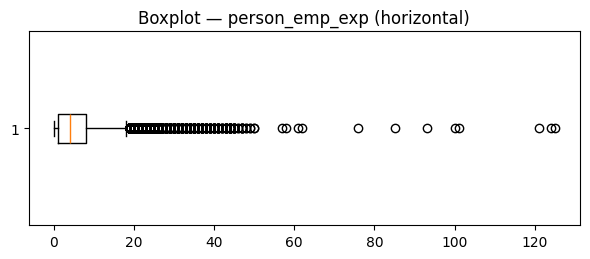

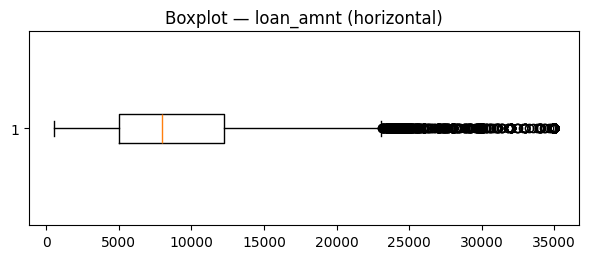

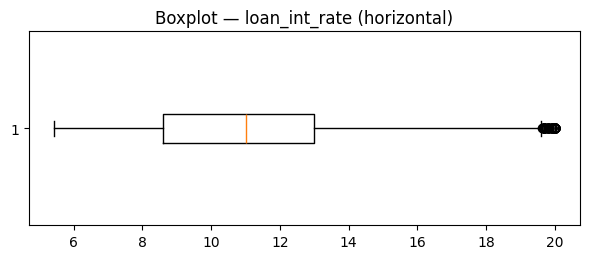

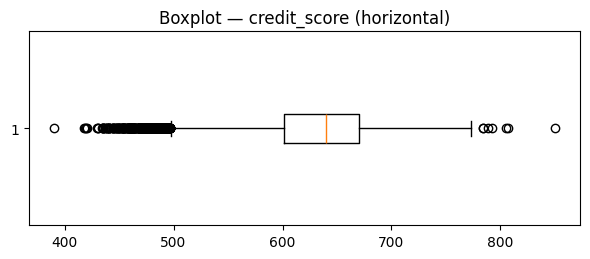

In [20]:
# Cell 8: boxplots (horizontal) to highlight outliers
for col in plot_cols:
    plt.figure(figsize=(6,2.7))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot — {col} (horizontal)")
    plt.tight_layout()
    plt.show()


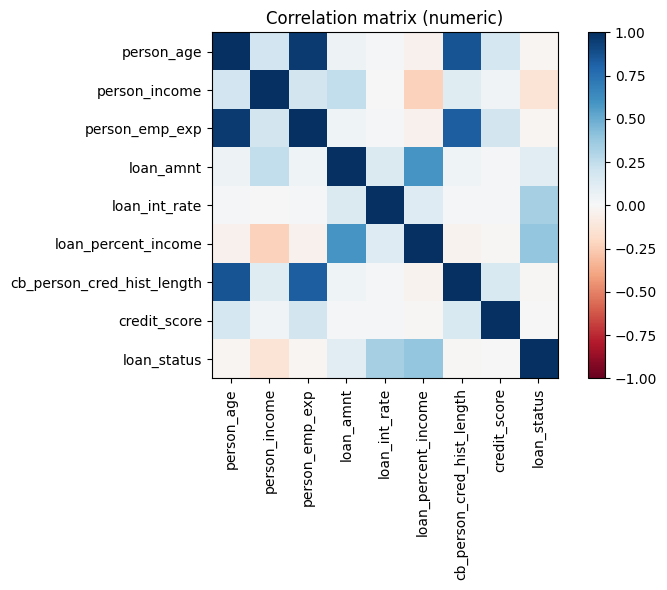

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.00,0.19,0.95,0.05,0.01,-0.04,0.86,0.18,-0.02
person_income,0.19,1.00,0.19,0.24,0.00,-0.23,0.12,0.04,-0.14
person_emp_exp,0.95,0.19,1.00,0.04,0.02,-0.04,0.82,0.19,-0.02
loan_amnt,0.05,0.24,0.04,1.00,0.15,0.59,0.04,0.01,0.11
loan_int_rate,0.01,0.00,0.02,0.15,1.00,0.13,0.02,0.01,0.33
loan_percent_income,-0.04,-0.23,-0.04,0.59,0.13,1.00,-0.03,-0.01,0.38
cb_person_cred_hist_length,0.86,0.12,0.82,0.04,0.02,-0.03,1.00,0.16,-0.01
credit_score,0.18,0.04,0.19,0.01,0.01,-0.01,0.16,1.00,-0.01
loan_status,-0.02,-0.14,-0.02,0.11,0.33,0.38,-0.01,-0.01,1.00


In [21]:
# Cell 9: correlation matrix among numeric variables
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr.values, interpolation='nearest', cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation matrix (numeric)")
plt.tight_layout()
plt.show()

# Show correlation table for quick reading
display(corr.round(2))


In [22]:
# Cell 10: categorical distributions + approval rates
cat_cols = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
cat_cols = [c for c in cat_cols if c in df.columns]

for c in cat_cols:
    print("\n" + "="*70)
    print(f"Column: {c}")
    print("- counts -")
    display(df[c].value_counts().to_frame("count"))
    print("- approval rate by category -")
    display(df.groupby(c)['loan_status'].mean().sort_values(ascending=False).to_frame("approval_rate"))



Column: person_gender
- counts -


,count
person_gender,
male,24841
female,20159


- approval rate by category -


,approval_rate
person_gender,
female,0.222481
male,0.222012



Column: person_education
- counts -


,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


- approval rate by category -


,approval_rate
person_education,
Doctorate,0.228663
Bachelor,0.225241
High School,0.223104
Associate,0.220319
Master,0.217622



Column: person_home_ownership
- counts -


,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


- approval rate by category -


,approval_rate
person_home_ownership,
OTHER,0.333333
RENT,0.323977
MORTGAGE,0.115961
OWN,0.075229



Column: loan_intent
- counts -


,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


- approval rate by category -


,approval_rate
loan_intent,
DEBTCONSOLIDATION,0.302729
MEDICAL,0.278194
HOMEIMPROVEMENT,0.263015
PERSONAL,0.201404
EDUCATION,0.169562
VENTURE,0.144264



Column: previous_loan_defaults_on_file
- counts -


,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


- approval rate by category -


,approval_rate
previous_loan_defaults_on_file,
No,0.45163
Yes,0.00000


In [23]:
# Cell 11: sanity checks for loan_percent_income
if 'loan_percent_income' in df.columns:
    display(df['loan_percent_income'].describe().to_frame("stats"))
    n_unreal = df[(df['loan_percent_income'] < 0) | (df['loan_percent_income'] > 1)].shape[0]
    print(f"Count of unrealistic loan_percent_income (<0 or >1): {n_unreal}")
else:
    print("loan_percent_income not present.")
    
# recompute as a safety check (loan_amnt divided by income)
if 'loan_amnt' in df.columns and 'person_income' in df.columns:
    df['loan_percent_income_recomputed'] = df['loan_amnt'] / (df['person_income'] + 1e-9)
    display(df[['loan_percent_income','loan_percent_income_recomputed']].head())


,stats
count,45000.000000
mean,0.139725
std,0.087212
min,0.000000
25%,0.070000
50%,0.120000
75%,0.190000
max,0.660000


Count of unrealistic loan_percent_income (<0 or >1): 0


,loan_percent_income,loan_percent_income_recomputed
0,0.49,0.486462
1,0.08,0.081420
2,0.44,0.442193
3,0.44,0.438855
4,0.53,0.529221


In [24]:
# Cell 12: flag rows with suspicious values (custom rules)
flags = pd.DataFrame(index=df.index)
flags['age_gt_100'] = df['person_age'] > 100
flags['emp_exp_gt_60'] = df['person_emp_exp'] > 60
income_99 = df['person_income'].quantile(0.99)
flags['income_gt_99p'] = df['person_income'] > income_99
flags['any_flag'] = flags.any(axis=1)

print("Counts flagged per rule:")
display(flags.sum().to_frame("count"))
print("\nTotal rows flagged by any rule:", flags['any_flag'].sum())

# Show examples for inspection
display(df[flags['any_flag']].head(10))


Counts flagged per rule:


,count
age_gt_100,7
emp_exp_gt_60,10
income_gt_99p,450
any_flag,456



Total rows flagged by any rule: 456


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_percent_income_recomputed
15,23.0,female,Master,600891.0,5,MORTGAGE,30000.0,DEBTCONSOLIDATION,10.65,0.05,3.0,670,Yes,0,0.049926
33,25.0,female,High School,368115.0,3,RENT,24250.0,DEBTCONSOLIDATION,13.85,0.07,3.0,567,Yes,0,0.065876
34,26.0,female,Associate,361076.0,1,MORTGAGE,7800.0,MEDICAL,13.49,0.02,4.0,669,No,0,0.021602
42,26.0,male,Bachelor,361293.0,5,MORTGAGE,20000.0,VENTURE,7.88,0.06,4.0,684,Yes,0,0.055357
43,23.0,male,High School,361547.0,0,OWN,24250.0,EDUCATION,19.41,0.07,2.0,637,Yes,0,0.067073
44,26.0,male,Master,360680.0,5,OWN,10000.0,HOMEIMPROVEMENT,10.38,0.03,4.0,649,No,0,0.027725
45,26.0,male,Bachelor,360977.0,5,MORTGAGE,25000.0,EDUCATION,15.33,0.07,3.0,695,Yes,0,0.069256
46,25.0,female,Bachelor,361244.0,2,MORTGAGE,18000.0,HOMEIMPROVEMENT,16.45,0.05,3.0,620,No,0,0.049828
55,26.0,male,High School,337133.0,7,RENT,10000.0,PERSONAL,15.96,0.03,3.0,623,Yes,0,0.029662
56,26.0,male,Associate,333566.0,2,RENT,20000.0,VENTURE,11.48,0.06,3.0,602,Yes,0,0.059958


In [25]:
# Cell 13: correlation with target (loan_status)
corr_with_target = corr['loan_status'].sort_values(ascending=False)
display(corr_with_target.to_frame("corr_with_target"))


,corr_with_target
loan_status,1.000000
loan_percent_income,0.384880
loan_int_rate,0.332005
loan_amnt,0.107714
credit_score,-0.007647
cb_person_cred_hist_length,-0.014851
person_emp_exp,-0.020481
person_age,-0.021476
person_income,-0.135808


In [26]:
# Cell 14: Approval rate vs binned credit score & income deciles
if 'credit_score' in df.columns:
    df['credit_score_bin'] = pd.qcut(df['credit_score'], 6, duplicates='drop')
    display(df.groupby('credit_score_bin')['loan_status'].mean().to_frame('approval_rate'))

if 'person_income' in df.columns:
    df['income_decile'] = pd.qcut(df['person_income'], 10, duplicates='drop')
    display(df.groupby('income_decile')['loan_status'].mean().to_frame('approval_rate').head(10))


C:\Users\rajus\AppData\Local\Temp\ipykernel_16408\815347205.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('credit_score_bin')['loan_status'].mean().to_frame('approval_rate'))


,approval_rate
credit_score_bin,
"(389.999, 583.0]",0.222851
"(583.0, 616.0]",0.227995
"(616.0, 640.0]",0.225119
"(640.0, 660.0]",0.222104
"(660.0, 681.0]",0.220819
"(681.0, 850.0]",0.213997


C:\Users\rajus\AppData\Local\Temp\ipykernel_16408\815347205.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('income_decile')['loan_status'].mean().to_frame('approval_rate').head(10))


,approval_rate
income_decile,
"(7999.999, 35118.9]",0.478222
"(35118.9, 43081.8]",0.404889
"(43081.8, 51221.0]",0.238169
"(51221.0, 59456.0]",0.226939
"(59456.0, 67048.0]",0.212397
"(67048.0, 76436.8]",0.182263
"(76436.8, 88474.9]",0.152000
"(88474.9, 103841.0]",0.140889
"(103841.0, 133276.1]",0.095778
